<a href="https://colab.research.google.com/github/KCLaurelie/NN-course/blob/master/Sentiment_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
import spacy
from spacy.attrs import LOWER

# Basic configuration for logging - needed for gensim to print some output
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Load the english model for spacy
nlp = spacy.load('en', disable=['ner', 'parser'])

# Get the data from github 

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/w-is-h/tmp/master/dataset.csv", encoding='cp1252')

In [0]:
df.head()

,SentimentText,Sentiment
0,"first think another Disney movie, might good, ...",1
1,"Put aside Dr. House repeat missed, Desperate H...",0
2,"big fan Stephen King's work, film made even gr...",1
3,watched horrid thing TV. Needless say one movi...,0
4,truly enjoyed film. acting terrific plot. Jeff...,1


# Print some statistics

The shape of the dataset is: (25000, 2)
The columns are: ['SentimentText', 'Sentiment']
Number of positive values: 12500


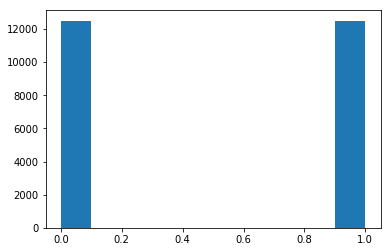

In [0]:
print("The shape of the dataset is: " + str(df.shape))
print("The columns are: " + str(list(df.columns)))
print("Number of positive values: " + str(np.sum(df['Sentiment'])))
_ = plt.hist(df['Sentiment'])

**We'll take only 10,000 examples, to speed thigns up a bit**

In [0]:
x = df['SentimentText'].values[0:10000]
y = df['Sentiment'].values[0:10000]

# Spacy

In [0]:
doc = nlp("I was running yesterday.")

In [0]:
print(doc)

I was running yesterday.


In [0]:
# To access tokens we can loop over the document
for token in doc:
  print(token)

I
was
running
yesterday
.


In [0]:
# Each token has multiple properties, e.g. lower_
for token in doc:
  print(token.lower_)

i
was
running
yesterday
.


# Split sentences into tokens and lowercase

In [0]:
# Print the first sentence
print(x[0])

first think another Disney movie, might good, it's kids movie. watch it, can't help enjoy it. ages love movie. first saw movie 10 8 years later still love it! Danny Glover superb could play part better. Christopher Lloyd hilarious perfect part. Tony Danza believable Mel Clark. can't help, enjoy movie! give 10/10!


In [0]:
# Lowercase and tokenize
x = [[tkn.lower_ for tkn in nlp(snt)] for snt in x]

In [0]:
# Print the first sentence
print(x[0])

['first', 'think', 'another', 'disney', 'movie', ',', 'might', 'good', ',', 'it', "'s", 'kids', 'movie', '.', 'watch', 'it', ',', 'ca', "n't", 'help', 'enjoy', 'it', '.', 'ages', 'love', 'movie', '.', 'first', 'saw', 'movie', '10', '8', 'years', 'later', 'still', 'love', 'it', '!', 'danny', 'glover', 'superb', 'could', 'play', 'part', 'better', '.', 'christopher', 'lloyd', 'hilarious', 'perfect', 'part', '.', 'tony', 'danza', 'believable', 'mel', 'clark', '.', 'ca', "n't", 'help', ',', 'enjoy', 'movie', '!', 'give', '10/10', '!']


In [0]:
# Train word2vec

In [0]:
w2v = Word2Vec(x, size=100, window=6, min_count=5, workers=4)

2019-05-28 01:05:06,427 : INFO : collecting all words and their counts
2019-05-28 01:05:06,431 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-05-28 01:05:06,832 : INFO : collected 65700 word types from a corpus of 1721139 raw words and 10000 sentences
2019-05-28 01:05:06,833 : INFO : Loading a fresh vocabulary
2019-05-28 01:05:07,124 : INFO : effective_min_count=5 retains 19684 unique words (29% of original 65700, drops 46016)
2019-05-28 01:05:07,125 : INFO : effective_min_count=5 leaves 1648471 word corpus (95% of original 1721139, drops 72668)
2019-05-28 01:05:07,189 : INFO : deleting the raw counts dictionary of 65700 items
2019-05-28 01:05:07,193 : INFO : sample=0.001 downsamples 25 most-common words
2019-05-28 01:05:07,194 : INFO : downsampling leaves estimated 1343731 word corpus (81.5% of prior 1648471)
2019-05-28 01:05:07,248 : INFO : estimated required memory for 19684 words and 100 dimensions: 25589200 bytes
2019-05-28 01:05:07,249 : INFO : re

In [0]:
w2v.wv.most_similar("good")

2019-05-28 01:05:20,814 : INFO : precomputing L2-norms of word weight vectors
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('bad', 0.7925644516944885),
 ('decent', 0.7340531349182129),
 ('nice', 0.7207351922988892),
 ('great', 0.704482913017273),
 ('cool', 0.7012462019920349),
 ('ok', 0.691887378692627),
 ('funny', 0.6696985363960266),
 ('liked', 0.6629442572593689),
 ('scary', 0.6501544713973999),
 ('terrible', 0.646700918674469)]

In [0]:
w2v.wv.get_vector("the")

array([ 1.1754472 ,  0.7916219 , -2.0651374 ,  2.9568279 ,  1.3927826 ,
        1.6311587 ,  0.6273241 ,  0.63842946,  1.9979316 ,  2.4576125 ,
       -1.6634429 , -0.01246866, -2.082713  , -0.70434576, -0.40960348,
       -1.4926958 ,  1.2895299 , -0.7032262 ,  1.0759975 ,  1.9340314 ,
        0.30817696,  1.4204202 ,  1.0983495 , -0.48264396, -2.6802473 ,
        0.4916686 , -1.3389573 ,  0.4920835 , -2.1878762 , -0.12529388,
        0.35615695,  0.9147299 ,  0.6138088 ,  0.8886433 ,  0.7766482 ,
        0.47593868,  1.1263003 , -0.52386624, -2.881109  ,  0.24126737,
       -0.64896846,  2.2955117 ,  0.09528604, -0.9031744 , -1.5419331 ,
       -0.09945309, -1.2456081 ,  0.94670457, -0.9949699 ,  0.29277313,
       -1.7357165 , -0.6435717 , -1.3266677 , -0.39406815,  1.0058509 ,
       -1.4181635 ,  0.19897349,  0.23112163, -0.5720692 ,  0.7837    ,
       -0.2615177 , -1.3698279 , -1.7192904 ,  0.21208386, -1.1627442 ,
       -0.035412  , -0.5080189 ,  0.14744543,  1.7261655 , -0.43

# Convert each sentence into the average sum of its tokens

In [0]:
# x_emb - embedded sentences
x_emb = np.zeros((len(x), 100))
# Loop over sentences
for i_snt, snt in enumerate(x):
  cnt = 0
  # Loop over the words of a sentence
  for i_word, word in enumerate(snt):
    if word in w2v.wv:
      x_emb[i_snt] += w2v.wv.get_vector(word)
      cnt += 1
  if cnt > 0:
    x_emb[i_snt] = x_emb[i_snt] / cnt
    

In [0]:
# Get torch stuff
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
import torch
import sklearn.metrics

# Build and initialize the network

In [0]:
device = torch.device('cuda')
class Net(nn.Module):
    def __init__(self):
      super(Net, self).__init__()
      self.fc1 = nn.Linear(100, 300)
      self.fc2 = nn.Linear(300, 30)
      self.fc3 = nn.Linear(30, 1)
      
    def forward(self, x):
      x = torch.relu(self.fc1(x))
      x = torch.relu(self.fc2(x))
      x = torch.sigmoid(self.fc3(x))
      return x

In [0]:
net = Net()
criterion = nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.99)

# Split the dataset into train/test/dev

In [0]:
inds = np.random.permutation(len(x))
inds_train = inds[0:int(0.8*len(x))]
inds_test = inds[int(0.8*len(x)):int(0.9*len(x))]
inds_dev = inds[int(0.9*len(x)):]

# 80% of the dataset
x_train = x_emb[inds_train]
y_train = y[inds_train]

# 10% of the dataset
x_test = x_emb[inds_test]
y_test = y[inds_test]

# 10% of the dataset
x_dev = x_emb[inds_dev]
y_dev = y[inds_dev]

x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)

x_dev = torch.tensor(x_dev, dtype=torch.float32)
y_dev = torch.tensor(y_dev.reshape(-1, 1), dtype=torch.float32)

x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32)

# Train

In [0]:
net.to(device)
x_train = x_train.to(device)
y_train = y_train.to(device)

x_dev = x_dev.to(device)
y_dev = y_dev.to(device)


net.to(device)
x_train = x_train.to(device)
y_train = y_train.to(device)

net.train()
losses = []
accs = []
ws = []
bs = []
for epoch in range(10000):  # do 10,000 epochs 
  # zero the gradients
  optimizer.zero_grad()

  # Forward 
  outputs = net(x_train)
  # Calculate error
  loss = criterion(outputs, y_train)
  # Backward
  loss.backward()
  # Optimize/Update parameters
  optimizer.step()
  
  # Track the changes - This is normally done using tensorboard or similar
  losses.append(loss.item())
  accs.append(sklearn.metrics.accuracy_score([1 if x > 0.5 else 0 for x in outputs.cpu().detach().numpy()], y_train.cpu().numpy()))
  ws.append(net.fc1.weight.cpu().detach().numpy()[0][0])
  bs.append(net.fc1.bias.cpu().detach().numpy()[0])

  # print statistics
  if epoch % 500 == 0:
      acc = sklearn.metrics.accuracy_score([1 if x > 0.5 else 0 for x in outputs.cpu().detach().numpy()], y_train.cpu().numpy())
      
      outputs_dev = net(x_dev)
      acc_dev = sklearn.metrics.accuracy_score([1 if x > 0.5 else 0 for x in outputs_dev.cpu().detach().numpy()], y_dev.cpu().numpy())
      
      print("Epoch: {:4} Loss: {:.5f} Acc: {:.3f} Acc Dev: {:.3f}".format(epoch, loss.item(), acc, acc_dev))

print('Finished Training')

Epoch:    0 Loss: 0.69965 Acc: 0.497 Acc Dev: 0.515
Epoch:  500 Loss: 0.62699 Acc: 0.677 Acc Dev: 0.689
Epoch: 1000 Loss: 0.47180 Acc: 0.778 Acc Dev: 0.769
Epoch: 1500 Loss: 0.45906 Acc: 0.783 Acc Dev: 0.780
Epoch: 2000 Loss: 0.45225 Acc: 0.788 Acc Dev: 0.772
Epoch: 2500 Loss: 0.44684 Acc: 0.793 Acc Dev: 0.773
Epoch: 3000 Loss: 0.44221 Acc: 0.795 Acc Dev: 0.775
Epoch: 3500 Loss: 0.43784 Acc: 0.796 Acc Dev: 0.775
Epoch: 4000 Loss: 0.43320 Acc: 0.800 Acc Dev: 0.771
Epoch: 4500 Loss: 0.42781 Acc: 0.803 Acc Dev: 0.773
Epoch: 5000 Loss: 0.42177 Acc: 0.806 Acc Dev: 0.775
Epoch: 5500 Loss: 0.41558 Acc: 0.810 Acc Dev: 0.767
Epoch: 6000 Loss: 0.40935 Acc: 0.813 Acc Dev: 0.768
Epoch: 6500 Loss: 0.40295 Acc: 0.817 Acc Dev: 0.766
Epoch: 7000 Loss: 0.39590 Acc: 0.819 Acc Dev: 0.769
Epoch: 7500 Loss: 0.38854 Acc: 0.824 Acc Dev: 0.772
Epoch: 8000 Loss: 0.38079 Acc: 0.828 Acc Dev: 0.770
Epoch: 8500 Loss: 0.37300 Acc: 0.832 Acc Dev: 0.763
Epoch: 9000 Loss: 0.36475 Acc: 0.836 Acc Dev: 0.758
Epoch: 9500 

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

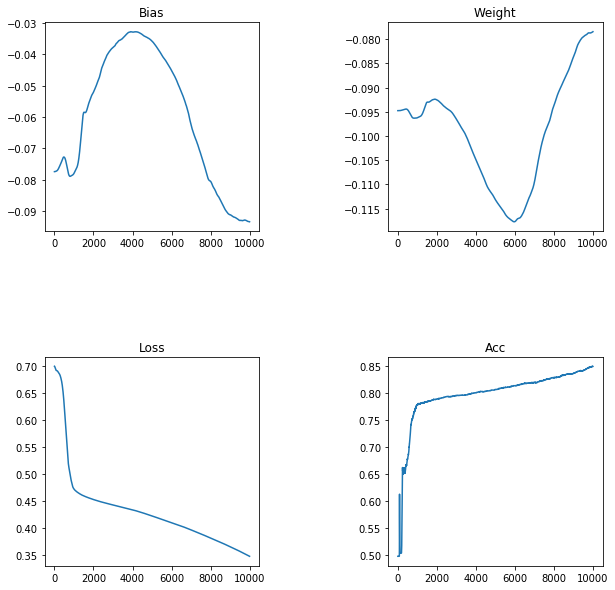

In [0]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.6, wspace=0.6)
fig.set_size_inches(10, 10)
plt.subplot(2, 2, 1)
sns.lineplot(np.arange(0, len(bs)), bs).set_title("Bias")

plt.subplot(2, 2, 2)
sns.lineplot(np.arange(0, len(ws)), ws).set_title("Weight")

# TODO: Add two plots for the Loss and Accuracy, place them in the right positions
plt.subplot(2, 2, 3)
sns.lineplot(np.arange(0, len(losses)), losses).set_title("Loss")

plt.subplot(2, 2, 4)
sns.lineplot(np.arange(0, len(accs)), accs).set_title("Acc")
fig.show()

In [0]:
net.eval()
net.to("cpu")

Net(
  (fc1): Linear(in_features=100, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=30, bias=True)
  (fc3): Linear(in_features=30, out_features=1, bias=True)
)

In [0]:
net(torch.tensor(x_emb[3], dtype=torch.float32))

tensor([0.0018], grad_fn=<SigmoidBackward>)

In [0]:
print(y[3])
print(df['SentimentText'].iloc[3])

0
watched horrid thing TV. Needless say one movies watch see much worse get. Frankly, don't know much lower bar go. <br /><br />The characters composed one lame stereo-type another, obvious attempt creating another "Bad News Bears" embarrassing say least.<br /><br />I seen prized turkeys time, reason list since "Numero Uno".<br /><br />Let put way, watched Vanilla Ice movie, bad funny. This...this...is even good.
